<a href="https://colab.research.google.com/github/Adarsh2shark/DSA-using-C-/blob/main/Sentiment_analysis_using_BagofWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import re # to find the patterns

# Module dor visualisation
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Tool for preprocessing input data
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import  gensim

In [81]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Sentiment_data.tsv to Sentiment_data (2).tsv


In [82]:
import pandas as pd
import io
 
data = pd.read_csv(io.BytesIO(uploaded['Sentiment_data.tsv']), delimiter = "\t")
data = data[:2000]
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [83]:
data.describe()

,sentiment
count,2000.000000
mean,0.498500
std,0.500123
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2000 non-null   object
 1   sentiment  2000 non-null   int64 
 2   review     2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [85]:
data = data.drop(['id'], axis = 1)
data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [86]:
data.shape

(2000, 2)

## ***Processing Data***

In [87]:
def processing(review):
  # removal of email address with 'emailaddr'
  raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', "", review)

  # remove URLs with 'httpaddr'
  raw_review = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', " ", raw_review)

  # remove non-letter
  raw_review = re.sub('[^a-zA-Z]', " ", raw_review)
  words = raw_review.lower().split()
  stop = set(stopwords.words("english"))  

  meaningful_words = [ps.stem(w) for w in words if not w in stop]
  return (" ".join(meaningful_words))

In [88]:
clean_review_corpus = []
ps = PorterStemmer()

In [89]:
review_count = data['review'].size
review_count

2000

In [90]:
data.review.head()

0    With all this stuff going down at the moment w...
1    \The Classic War of the Worlds\" by Timothy Hi...
2    The film starts with a manager (Nicholas Bell)...
3    It must be assumed that those who praised this...
4    Superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object

In [91]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
for i in range(0, review_count):
  clean_review_corpus.append(processing(data['review'][i]))  
# this particular code donot work if stopwords are not downloaded (like in above code)

In [93]:
 data["review"][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [94]:
clean_review_corpus[0]

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one level

## *Preparing vectors for each Message*

In [95]:
cv = CountVectorizer()

data_input = cv.fit_transform(clean_review_corpus)
data_input = data_input.toarray()
# mistake could be to use to_array() as function 

In [96]:
data_input[0]

array([0, 0, 0, ..., 0, 0, 0])

## Creating Word Cloud

In [97]:
# for this we need to import library to create the word cloud
from wordcloud import WordCloud, STOPWORDS

In [98]:
stopwords = set(STOPWORDS)

In [99]:
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_words = 200, max_font_size = 40, scale = 3, random_state = 1).generate(str(data))

  fig = plt.figure(1, figsize = (15, 15))
  plt.axis("off")

  if title:
    fig.subtitle(title, fontsize = 20)
    fig.subplots_adjust(top = 2.3)

  plt.imshow(wordcloud)
  plt.show()


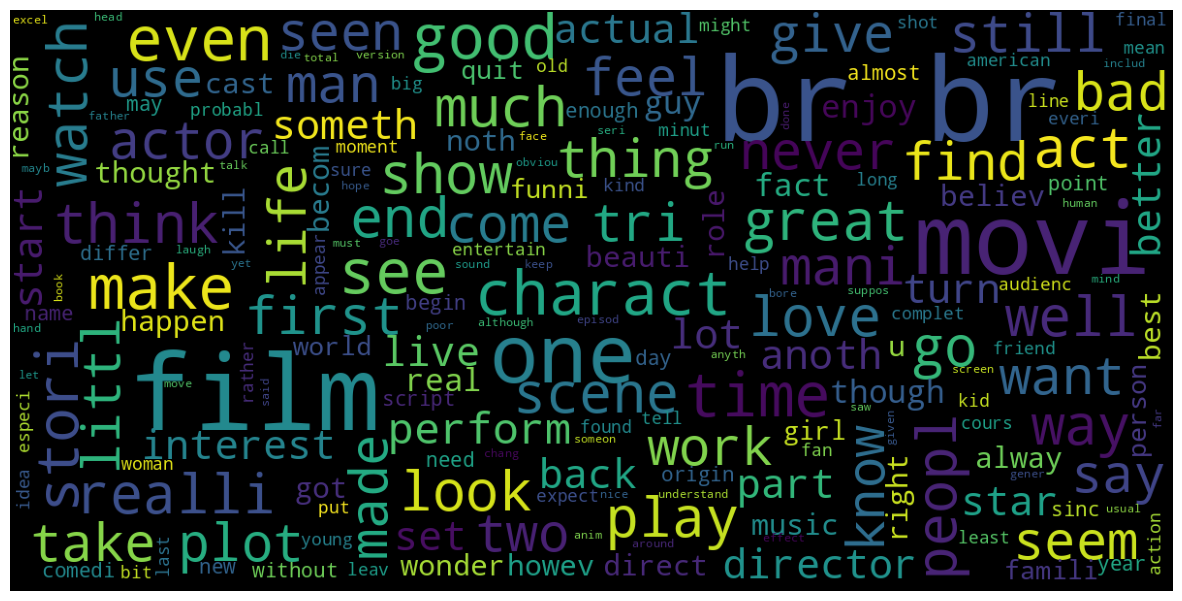

In [100]:
show_wordcloud(clean_review_corpus)

### **Applying Classificattion**

1.   Input = Prepared Sparse Matrix/ Vectors for each message
2.   Output = Negative or Positive Sentiment


In [101]:
data_output = data['sentiment']

<Axes: >

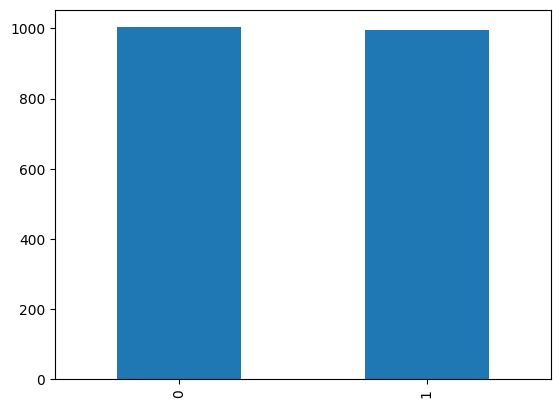

In [102]:
data_output.value_counts().plot.bar()

#### Splitting data for Training and Testing

In [103]:
data_input.shape

(2000, 17485)

In [104]:
data_output.shape

(2000,)

In [105]:
from sklearn.model_selection import train_test_split

data_subset = data[:2000]
data_input = clean_review_corpus[:2000]
data_output = data_subset['sentiment']

train_x, test_x, train_y, test_y = train_test_split(data_input, data_output, test_size=0.20, random_state=0)


# **Preparing ML models**

Training

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_x = vectorizer.fit_transform(train_x).toarray()
test_x = vectorizer.transform(test_x).toarray()

model_nvb = GaussianNB()
model_nvb.fit(train_x, train_y)

model_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf.fit(train_x, train_y)

model_dt = tree.DecisionTreeClassifier()
model_dt.fit(train_x, train_y)


DecisionTreeClassifier()

Predictions

In [107]:
prediction_nvb = model_nvb.predict(test_x)
prediction_rf = model_rf.predict(test_x)
prediction_dt = model_dt.predict(test_x)


In [108]:
# RESULT Naive bayes 
print("Accuracy for Naive Bayes : %0.5f \n\n " % accuracy_score(test_y, prediction_nvb))
print("Classification Report Naive Bayes : \n " , classification_report(test_y, prediction_nvb))

Accuracy for Naive Bayes : 0.63000 

 
Classification Report Naive Bayes : 
                precision    recall  f1-score   support

           0       0.65      0.71      0.68       219
           1       0.60      0.54      0.57       181

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.63      0.63       400



In [109]:
# RESULT Decision Tree 
print("Accuracy for Decision Tree : %0.5f \n\n " % accuracy_score(test_y, prediction_dt))
print("Classification Report Decision Tree : \n " , classification_report(test_y, prediction_dt))

Accuracy for Decision Tree : 0.67750 

 
Classification Report Decision Tree : 
                precision    recall  f1-score   support

           0       0.73      0.64      0.69       219
           1       0.62      0.72      0.67       181

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400



In [110]:
# RESULT Random Forest
print("Accuracy for Random Forest : %0.5f \n\n " % accuracy_score(test_y, prediction_rf))
print("Classification Report Random Forest : \n " , classification_report(test_y, prediction_rf))


Accuracy for Random Forest : 0.81250 

 
Classification Report Random Forest : 
                precision    recall  f1-score   support

           0       0.87      0.77      0.82       219
           1       0.76      0.86      0.81       181

    accuracy                           0.81       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.81      0.81       400

